### Análise de Polaridade
(comentários fb)

#### 1. <span style="color:#00b3b3">Instalação de pacotes</span>

In [ ]:
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('tidyverse')) install.packages('tidyverse')
if(!require('ggplot2')) install.packages('ggplot2')
if(!require('lexiconPT')) install.packages('lexiconPT')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('ggthemes')) install.packages('ggthemes')
if(!require('igraph')) install.packages('igraph')
if(!require('ggraph')) install.packages('ggraph')
source("http://bioconductor.org/biocLite.R")
biocLite("limma")

In [11]:
install.packages("tm", repos="http://R-Forge.R-project.org")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


#### 2. <span style="color:#00b3b3">Bibliotecas</span>

In [1]:
library(dplyr)
library(tidyverse)
library(tidytext)
library(ggplot2)
library(lexiconPT)

library(tm)
# library(tmap)

library(readr)
library(stringr)
# library(tidyr)
library(reshape2)
# library(syuzhet)
library(ggthemes)
library(wordcloud)
library(limma)
library(igraph)      # gerar grafo
library(ggraph)      # plotar grafo


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ readr   1.3.1
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.3.1
✔ ggplot2 3.1.0     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: RColorBrewer

Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:t

#### 3. <span style="color:#00b3b3">Carrega Dados</span>

In [22]:
# comments <- read.csv(file="comentarios.csv", header=TRUE, sep=",")
data = read.columns("comentarios.csv", c("post_text","comment_message"), sep = ",")
# comments
colnames(data)
lapply(data, head)

[1] "post_text"       "comment_message"

$post_text
[1] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[2] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[3] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[4] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[5] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[6] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
359 Levels:  ??????????? ... BanrisulPrev

$comment_message
[1] "Orgulho de fazer parte disso!!@ melhor banco!!!"    
[2] "Melhor Banco!!"                                     
[3] "#Mpaef #ENEF Me poupe #vemprompaef #MePoupe  Boraa!"
[4] "MELHOR BANCO!"                                      
[5] 👏👏👏                                                  
[6] #VEMPROMPAEF                                         
3916 Levels:  , ;) :) :D ?? ... \U0001f970

In [23]:
data

post_text,comment_message
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""Orgulho de fazer parte disso!!@ melhor banco!!!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""Melhor Banco!!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""#Mpaef #ENEF Me poupe #vemprompaef #MePoupe Boraa!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""","""MELHOR BANCO!"""
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",👏👏👏
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",#VEMPROMPAEF
"""Mais uma vez o Banrisul é o banco mais lembrado pelos gaúchos de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏 Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento produtos e serviços para quem mais importa: você cliente. 😃 Grupo Amanhã #top19""",Amo
"""Nathaliaarcuri chama o Banrisul para o #vemprompaef""","""Nathalia Arcuri"""
"""Parabenizamos todos os gerentes Banrisul pelo empenho e dedicação. 👏👏👏Um dia tão especial quanto o atendimento prestado aos nossos clientes.""","""Parabéns Niressa Leite Dos Santos"""
"""Parabenizamos todos os gerentes Banrisul pelo empenho e dedicação. 👏👏👏Um dia tão especial quanto o atendimento prestado aos nossos clientes.""","""Banco altamente burocratico, cheio de cabides de empregos. Em 5 ou 10 anos bancos como este serao engolidos pelos bancos digitais, e veremos os funcionarios concursados arrogantes do Banrisul, virando atendentes de telemarketing. Vide Uber,, acabaram com a mafia dos taxis. 😂😂😂"""


#### 4. <span style="color:#00b3b3">Pré-processamento</span>

- Cria lista personalizada de *stopwords* em português

In [4]:
custom_stop_words <- bind_rows(stop_words,
                               tibble(word = tm::stopwords("portuguese"),
                                          lexicon = "custom"), tibble(word = "banrisul", lexicon = "personalized"),
                              tibble(word = "é", lexicon = "personalized"))
custom_stop_words

word,lexicon
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART
after,SMART


In [5]:
custom_stop_words %>% filter_at(vars('word'), any_vars(. %in% c('é')))  

word,lexicon
é,personalized


- Separa as sentenças em *tokens* e remove as *stopwords*

In [24]:
dfCorpus = Corpus(VectorSource(data$comment_message)) 

In [25]:
# inspect(dfCorpus)
myCorpus <- tm_map(dfCorpus, tolower)
# myCorpus <- tm_map(myCorpus, removeWords, custom_stop_words)
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
myCorpus <- tm_map(myCorpus, removePunctuation)
myCorpus <- tm_map(myCorpus, removeWords, stopwords('pt'))
dictCorpus <- myCorpus
myCorpus <- tm_map(myCorpus, stemDocument)
# tokenize the corpus
myCorpusTokenized <- lapply(myCorpus, scan_tokenizer)
# stem complete each token vector
myTokensStemCompleted <- lapply(myCorpusTokenized, stemCompletion, dictCorpus)
# concatenate tokens by document, create data frame
comments <- data.frame(text = sapply(myTokensStemCompleted, paste, collapse = " "), stringsAsFactors = FALSE)
comments

Warning message in tm_map.SimpleCorpus(dfCorpus, tolower):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, stopwords("pt")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument):
“transformation drops documents”

text
orgulho fazer parte disso melhor banco
melhor banco
mpaef enef poupança vemprompaef mepoupe boraa
melhor banco
👏👏👏
vemprompaef
amo
nathalia arcuri
parabéns niressa leite santo
banco altamente burocratico cheio cabides emprego 5 10 ano banco serao engolidos banco digitais veremos funcionario concursados arroganteela banrisul virando atendente telemarketing vide uber acabaram mafia taxis 😂😂😂


In [29]:
# names(comments)[names(comments) == "text"] <- "comment_message"
# names(comments)[names(comments) == "comment_message"] <- "text"
# comments

In [26]:
# define as_data_frame como sendo apenas da biblioteca dplyr
as_data_frame <- dplyr::as_data_frame

In [27]:
comments <- comments %>% map_if(is.factor, as.character) %>% as_data_frame 
tidy_comments <- comments %>%
  unnest_tokens(word, text) %>%
  anti_join(custom_stop_words)

Joining, by = "word"


In [28]:
bing_word_counts <- tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


In [29]:
tidy_comments %>%
  count(word, sort = TRUE)

word,n
dia,494
parabéns,426
bom,383
inbox,352
banco,328
agência,268
olá,238
boa,207
obrigado,200
todo,167


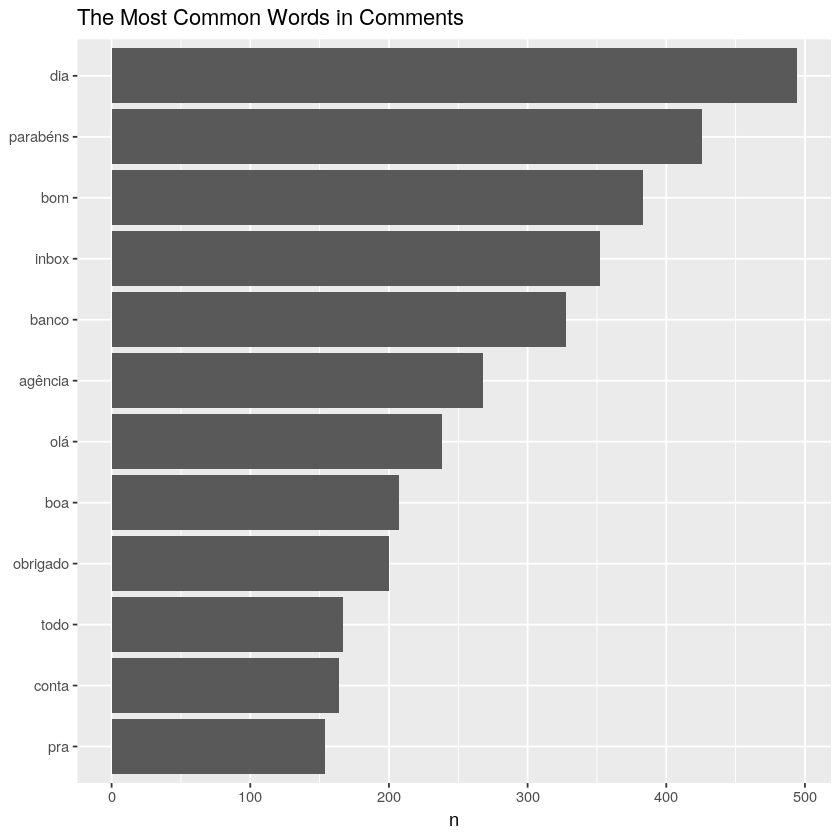

In [30]:
tidy_comments %>%
  count(word, sort = TRUE) %>%
  filter(n > 150) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("The Most Common Words in Comments")

In [31]:
bing_word_counts <- tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


**4.** Polaridade

Selecting by n


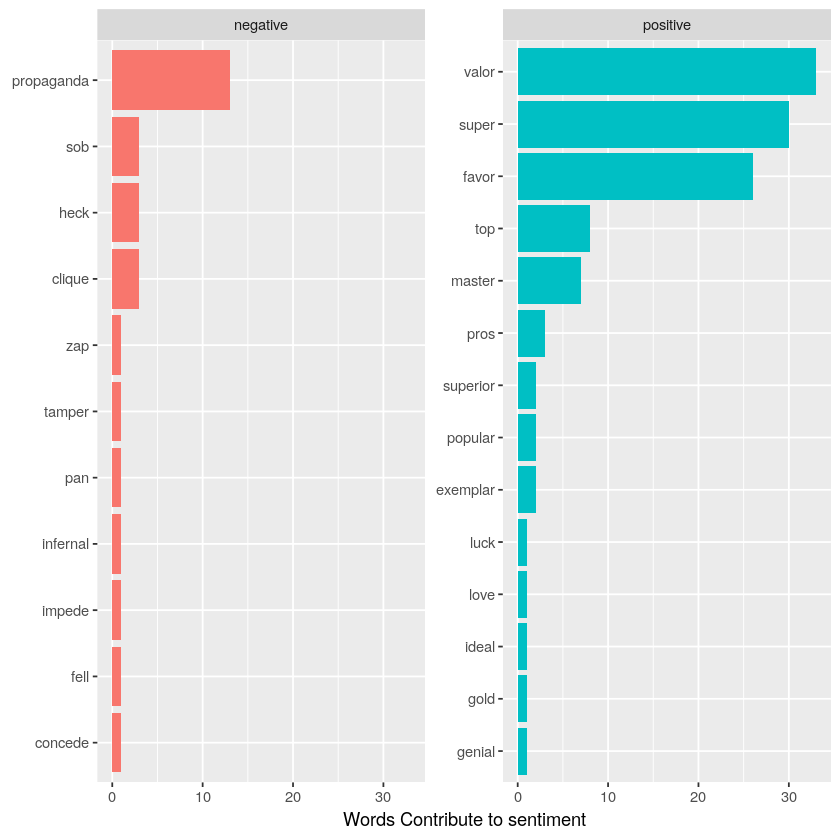

In [32]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Words Contribute to sentiment",
       x = NULL) +
  coord_flip()

Joining, by = "word"


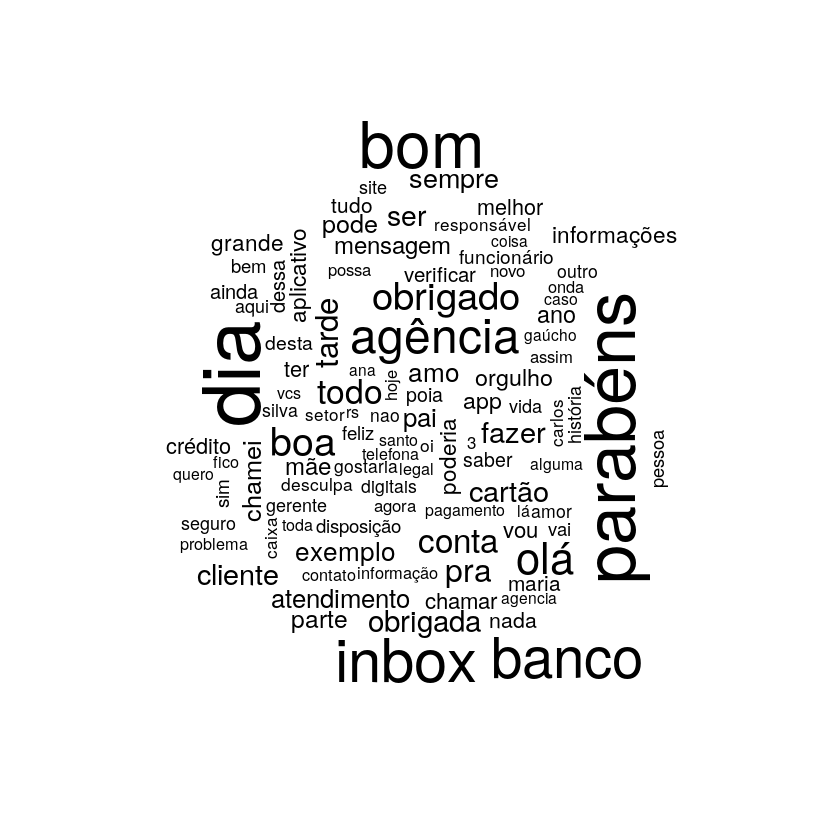

In [33]:
tidy_comments%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


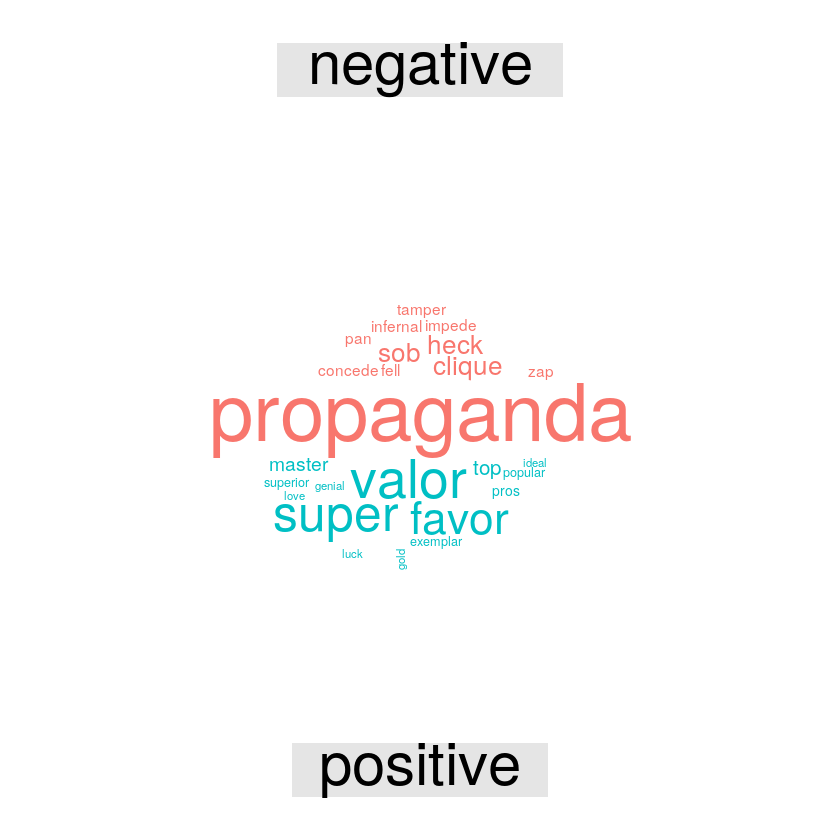

In [34]:
tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

### Relações entre palavras

In [35]:
comments_bigrams <- comments %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
# comments_bigrams

In [36]:
bigrams_separated <- comments_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
# bigram_counts

In [37]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
# bigrams_united

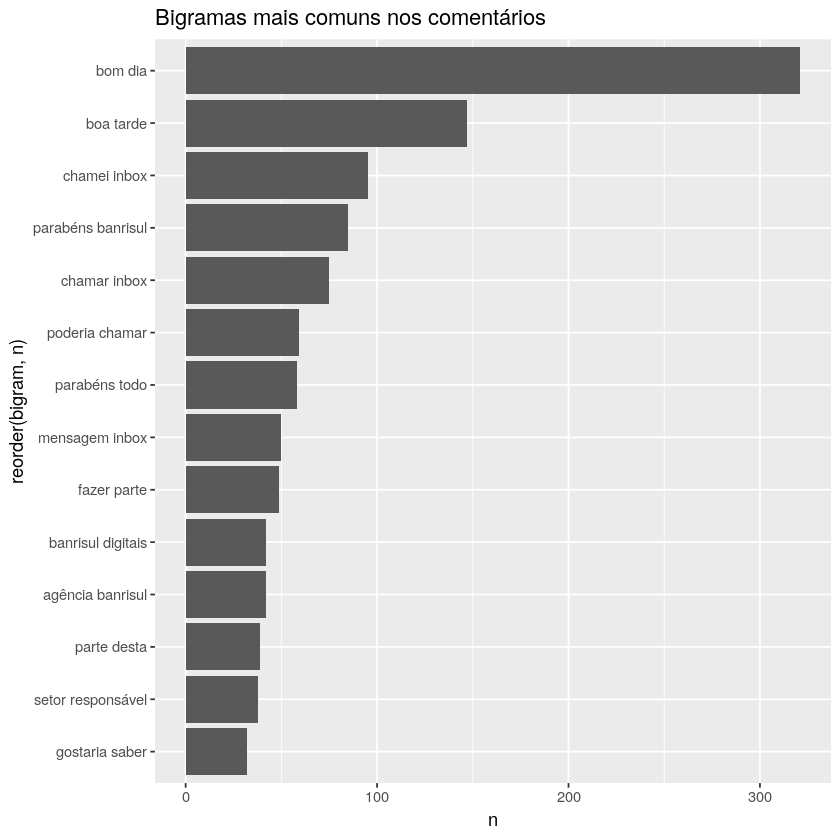

In [38]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("Bigramas mais comuns nos comentários") + coord_flip()

In [39]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
# bigram_graph

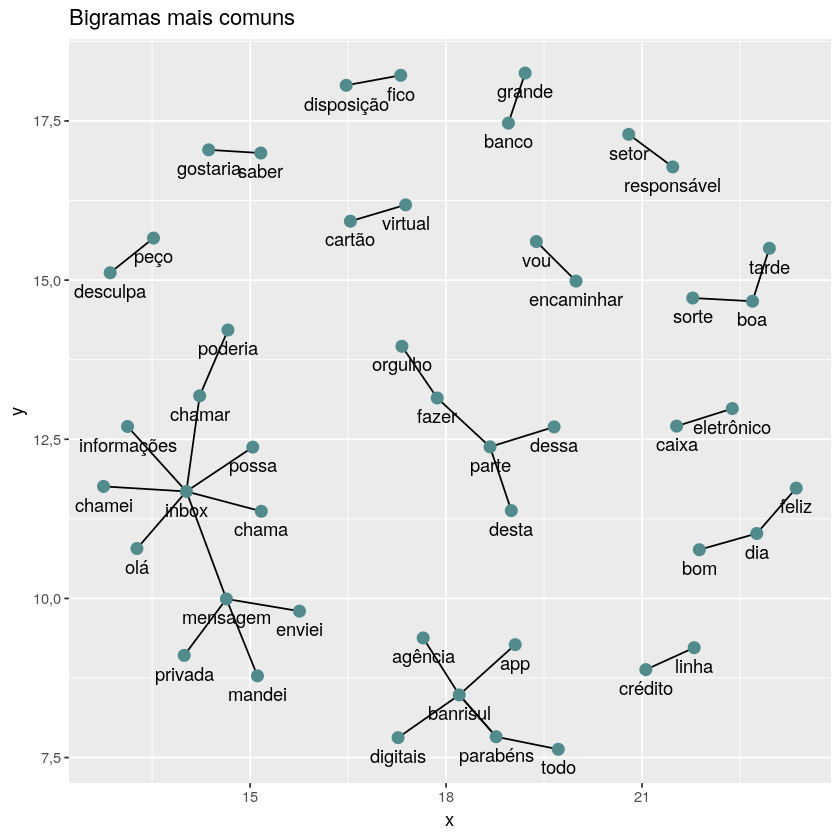

In [40]:
set.seed(2019)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Bigramas mais comuns")

In [41]:
tale <- character()
tale

character(0)

In [ ]:
merge(data, comments)